## Diminutive Suffix Productivity: further cleaning and descriptive analysis
Juan Berrios | jeb358@pitt.edu | Last updated: March 17, 2020

**Summary and overview:**

- This notebook is a continuation of the [corpus processing notebook](https://github.com/Data-Science-for-Linguists-2020/Diminutive-Suffix-Productivity/blob/master/code/corpus_processing.ipynb) in my repository. The purpose is to finish cleaning the data frame objects I've built (which were previously pickled in order to be loaded here) and create a master, cross-dialectal data frame to explore descriptive statistics and get started on the linguistics analysis of the data.

**Contents:**
- [Section 1](###1.-Preparation)  includes the necessary preparations and looading of the files.
- [Section 2](###2.-Further-cleaning)  includes code for performing further cleaning on the data to remove extraneous rows that are still left.
- [Section 3](###3.-Exploratory-analysis) is the start of the analysis, with a focus on descriptive statistics and data visualization.
- [Section 4](###4.-Storing-files)  includes code for storing the results as pickled files.

### 1. Preparation

- Loading libraries and additional settings:

In [1]:
#Importing libraries
import glob, pickle, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Turning pretty print off:
%pprint

#Releasing all output:                                            
from IPython.core.interactiveshell import InteractiveShell #Prints all commands rather than the last one.
InteractiveShell.ast_node_interactivity = "all"

Pretty printing has been turned OFF


- Loading pickle files

In [2]:
ar_DF = pickle.load(open('ar_DF.pkl', 'rb'))
bo_DF = pickle.load(open('bo_DF.pkl', 'rb'))
cl_DF = pickle.load(open('cl_DF.pkl', 'rb'))
co_DF = pickle.load(open('co_DF.pkl', 'rb'))
cr_DF = pickle.load(open('cr_DF.pkl', 'rb'))
cu_DF = pickle.load(open('cu_DF.pkl', 'rb'))
do_DF = pickle.load(open('do_DF.pkl', 'rb'))
ec_DF = pickle.load(open('ec_DF.pkl', 'rb'))
es_DF = pickle.load(open('es_DF.pkl', 'rb'))
gt_DF = pickle.load(open('gt_DF.pkl', 'rb'))
hn_DF = pickle.load(open('hn_DF.pkl', 'rb'))
mx_DF = pickle.load(open('mx_DF.pkl', 'rb'))
ni_DF = pickle.load(open('ni_DF.pkl', 'rb'))
pa_DF = pickle.load(open('pa_DF.pkl', 'rb'))
pe_DF = pickle.load(open('pe_DF.pkl', 'rb'))
pr_DF = pickle.load(open('pr_DF.pkl', 'rb'))
py_DF = pickle.load(open('py_DF.pkl', 'rb'))
sv_DF = pickle.load(open('sv_DF.pkl', 'rb'))
us_DF = pickle.load(open('us_DF.pkl', 'rb'))
uy_DF = pickle.load(open('uy_DF.pkl', 'rb'))

In [3]:
type(ar_DF)
type(bo_DF)
type(cl_DF)
type(co_DF)
type(cr_DF)
type(cu_DF)
type(do_DF)
type(ec_DF)
type(es_DF)
type(gt_DF)
type(hn_DF)
type(mx_DF)
type(ni_DF)
type(pa_DF)
type(pe_DF)
type(pr_DF)
type(py_DF)
type(sv_DF)
type(us_DF)
type(uy_DF)

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

In [4]:
print('Argentina rows:', ar_DF.shape[0])
print('Bolivia rows:', bo_DF.shape[0])
print('Chile rows:', cl_DF.shape[0])
print('Colombia rows:', co_DF.shape[0])
print('Costa Rica:', cr_DF.shape[0])
print('Cuba rows:', cu_DF.shape[0])
print('Dominican Republic rows:', do_DF.shape[0])
print('Ecuador rows:', ec_DF.shape[0])
print('Spain rows:', es_DF.shape[0])
print('Guatemala rows:', gt_DF.shape[0])
print('Honduras rows:', hn_DF.shape[0])
print('Mexico rows:', mx_DF.shape[0])
print('Nicaragua rows:', ni_DF.shape[0])
print('Panama rows:', pa_DF.shape[0])
print('Peru rows:', pe_DF.shape[0])
print('Puerto Rico rows:', pr_DF.shape[0])
print('Paraguay rows:', py_DF.shape[0])
print('El Salvador rows:', sv_DF.shape[0])
print('US rows rows:', us_DF.shape[0])
print('Uruguay rows:', uy_DF.shape[0])

Argentina rows: 616845
Bolivia rows: 143682
Chile rows: 247619
Colombia rows: 646821
Costa Rica: 125645
Cuba rows: 214837
Dominican Republic rows: 145577
Ecuador rows: 234485
Spain rows: 1719752
Guatemala rows: 224592
Honduras rows: 136451
Mexico rows: 939030
Nicaragua rows: 129622
Panama rows: 455817
Peru rows: 451522
Puerto Rico rows: 145101
Paraguay rows: 103839
El Salvador rows: 146933
US rows rows: 626729
Uruguay rows: 137585


In [5]:
master_DF = pd.concat([ar_DF, bo_DF, cl_DF, co_DF, cr_DF, cu_DF, do_DF, ec_DF, es_DF, gt_DF, hn_DF,
                mx_DF, ni_DF, pa_DF, pe_DF, pr_DF, py_DF, sv_DF, us_DF, uy_DF], sort=True)

In [6]:
print('Master rows:', master_DF.shape[0])

Master rows: 7592484


In [7]:
master_DF = master_DF.dropna()

In [8]:
print('Master rows:', master_DF.shape[0])

Master rows: 7590609


In [9]:
master_DF.keys()

Index(['Lemma', 'POS', 'SourceID', 'TokenID', 'Variety', 'Word'], dtype='object')

In [10]:
master_DF = master_DF[['SourceID', 'TokenID', 'Lemma', 'Word', 'POS', 'Variety']]

In [11]:
master_DF.keys()

Index(['SourceID', 'TokenID', 'Lemma', 'Word', 'POS', 'Variety'], dtype='object')

### 2. Further cleaning

In [12]:
master_DF['POS'].value_counts()

n           1370111
nms         1306937
o            848151
nfs          707053
nmp          635693
vip-3s       613522
jms          371646
j            360502
jfs          328370
vip-1s       235896
nfp          135066
vps-ms       129978
jmp          102855
vsp-1/3s     100798
jfp           85536
vip-2s        81871
r             49707
v             45588
vps-fs        36387
vps-mp        19406
vps-fp        13977
vsp-2s         6941
np             1562
x              1142
m$              991
i               420
vr              201
fn              159
vm-2s           108
xy               19
e                12
y                 3
vm-3s             1
Name: POS, dtype: int64

In [13]:
master_DF = master_DF[master_DF['POS'].str.contains('n|j')] 

In [14]:
master_DF.shape

(5405490, 6)

In [15]:
master_DF['POS'].value_counts()

n          1370111
nms        1306937
nfs         707053
nmp         635693
jms         371646
j           360502
jfs         328370
nfp         135066
jmp         102855
jfp          85536
np            1562
fn             159
Name: POS, dtype: int64

In [16]:
master_DF = master_DF[master_DF['POS'] != ('fn')] 

In [17]:
master_DF.sample(5)

,SourceID,TokenID,Lemma,Word,POS,Variety
2748001,1334916,1228863491,castillo,Castillo,nms,AR
10540625,1753621,2127988076,sevilla,Sevilla,n,ES
947021,2276932,258204365,rabillo,rabillo,nms,US
221459,1645962,268337648,escrito,escritos,nmp,ES
6928047,74161,2416500635,pleito,pleito,nms,AR


In [18]:
master_DF['POS'].value_counts()

n          1370111
nms        1306937
nfs         707053
nmp         635693
jms         371646
j           360502
jfs         328370
nfp         135066
jmp         102855
jfp          85536
np            1562
Name: POS, dtype: int64

In [19]:
master_DF['POS'].unique()

array(['nmp    ', 'nfs    ', 'n', 'jfs    ', 'nms    ', 'j', 'jms    ',
       'nfp    ', 'jmp    ', 'jfp    ', 'np'], dtype=object)

In [20]:
master_DF['POS'] = master_DF['POS'].str.strip()

In [21]:
master_DF['POS'].unique()

array(['nmp', 'nfs', 'n', 'jfs', 'nms', 'j', 'jms', 'nfp', 'jmp', 'jfp',
       'np'], dtype=object)

In [22]:
pos_dict = {'n': 'n', 'nms': 'n', 'nfs': 'n', 'nmp': 'n', 'nfp': 'n', 'np': 'n', 
             'j': 'j', 'jms': 'j', 'jfs': 'j', 'jmp': 'j', 'jfp': 'j'}

In [23]:
master_DF['POS_binary'] = master_DF['POS'].map(pos_dict)

In [24]:
master_DF.sample(10)

,SourceID,TokenID,Lemma,Word,POS,Variety,POS_binary
14834782,1794396,1088030266,parejita,parejita,n,ES,n
274707,1087628,1636645155,principito,principito,n,SV,n
2356817,1104505,874932574,compañerito,compañeritos,n,SV,n
2214956,1582849,1941940429,pegadito,pegadita,j,CU,j
1246989,2276815,956973181,súbito,súbito,jms,US,j
4233039,231102,277576212,escrito,escrito,jms,CO,j
2872891,464057,1374454448,bonito,bonitas,jfp,ES,j
456391,1897463,377090968,bonito,bonitos,jmp,GT,j
6986223,498662,185756180,sencillo,sencillo,jms,ES,j
278629,1310563,403463016,aulicrédito,aulicréditos,n,AR,n


In [25]:
number_dict = {'n': 'unknown', 'nms': 'singular', 'nfs': 'singular', 'nmp': 'plural', 'nfp': 'plural', 
                  'np': 'unknown', 'j': 'unknown', 'jms': 'singular', 'jfs': 'singular', 'jmp': 'plural', 
                  'jfp': 'plural'}

In [26]:
gender_dict = {'n': 'unknown', 'nms': 'masculine', 'nfs': 'feminine', 'nmp': 'masculine', 'nfp': 'feminine', 
                  'np': 'unknown', 'j': 'unknown', 'jms': 'masculine', 'jfs': 'feminine', 'jmp': 'masculine', 
                  'jfp': 'feminine'}

In [27]:
master_DF['Number'] = master_DF['POS'].map(number_dict)

In [28]:
master_DF.sample(5)

,SourceID,TokenID,Lemma,Word,POS,Variety,POS_binary,Number
4362179,231118,1741508840,éxito,éxito,n,CO,n,unknown
18582499,596688,1650853096,banquillo,banquillo,nms,ES,n,singular
6530697,1710462,132916522,rodilla,rodilla,nfs,ES,n,singular
7523883,1377635,910288480,ámbito,ámbito,n,AR,n,unknown
22223491,626903,493852117,ámbito,ámbito,n,ES,n,unknown


In [29]:
master_DF['Gender'] = master_DF['POS'].map(gender_dict)

In [30]:
master_DF.sample(5)

,SourceID,TokenID,Lemma,Word,POS,Variety,POS_binary,Number,Gender
4330110,797586,1139570343,palomita,palomitas,nfp,MX,n,plural,feminine
14119045,1795199,1766487683,mito,mitos,nmp,ES,n,plural,masculine
15522373,583158,2337974028,ojito,Ojitos,nmp,ES,n,plural,masculine
3242808,32732,203252987,crédito,crédito,nms,AR,n,singular,masculine
698981,122756,1185634605,cita,cita,nfs,BO,n,singular,feminine


Frequency-based approach to remove last extraneous rows:

In [31]:
fname = '../../Diminutive-Suffix-Productivity/private/data/span_lexicon/span_dic.txt'
lexicon = pd.read_csv(fname,sep='\t',encoding='iso-8859-1',skiprows=[1],low_memory=False) 

In [32]:
lexicon

,wID,word,lemma,PoS
0,1,",","$,",y
1,2,de,de,e
2,3,.,$.,y
3,4,la,la,ld-fs
4,5,y,y,cc
...,...,...,...,...
8754578,11925785,@@999948,NaN,NaN
8754579,11925786,@@99996,NaN,NaN
8754580,11925787,@@999965,NaN,NaN
8754581,11925788,@@999974,NaN,NaN


In [33]:
lexicon = lexicon.rename(columns={"wID": "WordID", "word": "Word", "lemma": "Lemma", "PoS": "POS"})

In [34]:
lexicon

,WordID,Word,Lemma,POS
0,1,",","$,",y
1,2,de,de,e
2,3,.,$.,y
3,4,la,la,ld-fs
4,5,y,y,cc
...,...,...,...,...
8754578,11925785,@@999948,NaN,NaN
8754579,11925786,@@99996,NaN,NaN
8754580,11925787,@@999965,NaN,NaN
8754581,11925788,@@999974,NaN,NaN


In [35]:
lexicon = lexicon.dropna()

In [36]:
lexicon

,WordID,Word,Lemma,POS
0,1,",","$,",y
1,2,de,de,e
2,3,.,$.,y
3,4,la,la,ld-fs
4,5,y,y,cc
...,...,...,...,...
8474411,11645618,descabellados,descabellar,v
8474412,11645619,hacendados,hacendar,v
8474413,11645620,reposeídas,reposeer,v
8474414,11645621,remozadas,remozar,v


In [37]:
lexicon['POS'].unique()

array(['y', 'e', 'ld-fs', 'cc', 'ld-ms', 'cs', 'ld-mp', 'xx', 'li-ms',
       'po', 'r', 'vip-3s', 'ld-fp', 'li-fs', 'dp-', 'dd-', 'v', 'vip-3p',
       'cS_22', 'vr', 'ld', 'nmp    ', 'nfs    ', 'j', 'pd-3cs', 'mc',
       'ps', 'nms    ', 'nfp    ', 'vii-1/3s', 'dxmp-ind-', 'pi-0cn',
       'pi-0ms', 'vis-3s', 'cS_21', 'dxms-ind-', 'pi', 'dxcs-ind-',
       'vsp-1/3s', 'o', 'n', 'pr-3cs', 'dxfp-ind-', 'pq-3cn', 'dxfs-ind-',
       'm$', 'pr-3cn"', 'jms    ', 'li-mp', 'px-ms', 'vip-1s', 'cS_33',
       'dxfs-', 'vps-ms', 'vif-3s', 'dxcs-dem-', 'jfs    ', 'jmp    ',
       'pr-3cp', 'pi-3cs', 'pp-2cs', 'vip-1p', 'px', 'vc-1/3s', 'pp-1cs',
       'cC_22', 'x', 'vpp', 'li-fp', 'pq-3cn"', 'vip-2s', 'vii-3p',
       'cC_21', 'jfp    ', 'i', 'e_32', 'vsp-3p', 'vis-3p', 'pi-3ms',
       'e_21', 'dd', 'pp-2cp', 'pq-3cs', 'px-mp', 'cc-', 'b', 'cS_32',
       'vsi-1/3s', 'dxcp-dem-', 'pr-3ms', 'vc-3p', 'pr-3fs', 'dxfp-',
       'e_22', 'vif-3p', 'vis-1s', 'cS_31', 'vip-1p/vis-1p', 'pp-2p',
    

In [38]:
lexicon['POS'] = lexicon['POS'].str.strip()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
lexicon['POS'].unique()

array(['y', 'e', 'ld-fs', 'cc', 'ld-ms', 'cs', 'ld-mp', 'xx', 'li-ms',
       'po', 'r', 'vip-3s', 'ld-fp', 'li-fs', 'dp-', 'dd-', 'v', 'vip-3p',
       'cS_22', 'vr', 'ld', 'nmp', 'nfs', 'j', 'pd-3cs', 'mc', 'ps',
       'nms', 'nfp', 'vii-1/3s', 'dxmp-ind-', 'pi-0cn', 'pi-0ms',
       'vis-3s', 'cS_21', 'dxms-ind-', 'pi', 'dxcs-ind-', 'vsp-1/3s', 'o',
       'n', 'pr-3cs', 'dxfp-ind-', 'pq-3cn', 'dxfs-ind-', 'm$', 'pr-3cn"',
       'jms', 'li-mp', 'px-ms', 'vip-1s', 'cS_33', 'dxfs-', 'vps-ms',
       'vif-3s', 'dxcs-dem-', 'jfs', 'jmp', 'pr-3cp', 'pi-3cs', 'pp-2cs',
       'vip-1p', 'px', 'vc-1/3s', 'pp-1cs', 'cC_22', 'x', 'vpp', 'li-fp',
       'pq-3cn"', 'vip-2s', 'vii-3p', 'cC_21', 'jfp', 'i', 'e_32',
       'vsp-3p', 'vis-3p', 'pi-3ms', 'e_21', 'dd', 'pp-2cp', 'pq-3cs',
       'px-mp', 'cc-', 'b', 'cS_32', 'vsi-1/3s', 'dxcp-dem-', 'pr-3ms',
       'vc-3p', 'pr-3fs', 'dxfp-', 'e_22', 'vif-3p', 'vis-1s', 'cS_31',
       'vip-1p/vis-1p', 'pp-2p', 'pq-3cp', 'pv', 'cS_44', 'mo-ms-',
 

In [40]:
dim_lexicon = lexicon[lexicon['Word'].str.contains(r'\w*i(t|ll)(o|a)s?\b')]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [41]:
dim_lexicon

,WordID,Word,Lemma,POS
713,714,éxito,éxito,n
798,799,necesita,necesitar,vip-3s
1599,1600,propósito,propósito,nms
1678,1679,ámbito,ámbito,n
1700,1701,visita,visita,nfs
...,...,...,...,...
8471444,11642632,Zurroncito,zurroncito,o
8471445,11642633,zurroncitos,zurroncito,n
8471514,11642703,zurullito,zurullito,j
8471536,11642725,zurunguillas,zurunguilla,n


In [42]:
dim_lexicon = dim_lexicon[dim_lexicon['POS'].str.contains('n|j')] 

In [43]:
dim_lexicon['POS'].unique()

array(['n', 'nms', 'nfs', 'jfs', 'jms', 'nmp', 'nfp', 'j', 'jfp', 'jmp',
       'np', 'fn'], dtype=object)

In [44]:
dim_lexicon = dim_lexicon[dim_lexicon['POS'] != ('fn')] 

In [45]:
dim_lexicon['POS'].unique()

array(['n', 'nms', 'nfs', 'jfs', 'jms', 'nmp', 'nfp', 'j', 'jfp', 'jmp',
       'np'], dtype=object)

In [46]:
dim_lexicon.shape

(70351, 4)

In [47]:
lemmas = dim_lexicon['Lemma']

In [48]:
len(lemmas)
type(lemmas)

70351

<class 'pandas.core.series.Series'>

In [49]:
lexicalized = set(lemmas[:200])

In [50]:
len(lexicalized)

113

In [51]:
type(lexicalized)

<class 'set'>

In [52]:
lexicalized

{'amarillo', 'depósito', 'orilla', 'capilla', 'martillo', 'ladrillo', 'órbita', 'escrito', 'tránsito', 'maldito', 'sevilla', 'brillo', 'castillo', 'circuito', 'hito', 'propósito', 'pandilla', 'cápita', 'rodilla', 'dígito', 'ratito', 'distrito', 'abuelita', 'semilla', 'apetito', 'ilícito', 'sencillo', 'añito', 'inédito', 'granito', 'perito', 'caudillo', 'jesuita', 'mosquito', 'cucharadita', 'rito', 'pleito', 'ejército', 'pastilla', 'tobillo', 'lícito', 'pesadilla', 'platillo', 'mejilla', 'pasillo', 'casita', 'milla', 'crédito', 'perrito', 'mundillo', 'súbito', 'súbdito', 'zapatilla', 'poquito', 'redondilla', 'arcilla', 'cosita', 'costilla', 'planilla', 'mérito', 'anillo', 'israelita', 'silla', 'guerrilla', 'cigarrillo', 'incógnita', 'cepillo', 'ámbito', 'ventanilla', 'delito', 'maravilla', 'carrito', 'credito', 'grito', 'señorita', 'débito', 'cajita', 'infinito', 'suscrito', 'mantequilla', 'éxito', 'requisito', 'bendito', 'mito', 'gratuito', 'bolsillo', 'cita', 'taquilla', 'cuchillo', '

Final step:

In [53]:
master_DF = master_DF[~master_DF['Lemma'].isin(lexicalized)] #Pandas way to select rows of based on values bot found in a list.

In [54]:
master_DF.shape

(1536896, 9)

In [55]:
master_DF.sample(5)

,SourceID,TokenID,Lemma,Word,POS,Variety,POS_binary,Number,Gender
985719,759060,829374508,viejito,viejito,n,MX,n,unknown,unknown
1428077,154058,2358358117,papita,papitas,n,CL,n,unknown,unknown
3815217,2193082,227886897,riolito,riolito,n,PA,n,unknown,unknown
2899330,986984,2454348832,chiquito,chiquitos,nmp,PE,n,plural,masculine
584441,2382682,190472791,calladito,calladito,j,UY,j,unknown,unknown


### 3. Exploratory analysis

In [56]:
def get_dim(lemma):
    if lemma[-4:] == 'illo' or lemma[-4:] == 'illa':
        return '-illo'
    else: return '-ito'

In [57]:
master_DF['Diminutive'] = master_DF['Lemma'].map(get_dim)

In [58]:
master_DF.sample(5)

,SourceID,TokenID,Lemma,Word,POS,Variety,POS_binary,Number,Gender,Diminutive
22786242,631832,230663588,hipócrita,hipócrita,jms,ES,j,singular,masculine,-ito
9672203,1399935,990021903,osito,ositos,n,AR,n,unknown,unknown,-ito
4966783,1009407,2302356114,circunscrito,circunscrito,j,PE,j,unknown,unknown,-ito
1323713,1572745,939161814,barquito,barquito,n,CU,n,unknown,unknown,-ito
2556549,350706,1170144191,coletilla,coletilla,nfs,CU,n,singular,feminine,-illo


In [59]:
master_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1536896 entries, 1338 to 2061267
Data columns (total 10 columns):
SourceID      1536896 non-null object
TokenID       1536896 non-null object
Lemma         1536896 non-null object
Word          1536896 non-null object
POS           1536896 non-null object
Variety       1536896 non-null object
POS_binary    1536896 non-null object
Number        1536896 non-null object
Gender        1536896 non-null object
Diminutive    1536896 non-null object
dtypes: object(10)
memory usage: 129.0+ MB


In [60]:
master_DF.describe() 

,SourceID,TokenID,Lemma,Word,POS,Variety,POS_binary,Number,Gender,Diminutive
count,1536896,1536896,1536896,1536896,1536896,1536896,1536896,1536896,1536896,1536896
unique,490972,1443283,40307,50201,11,20,2,3,3,2
top,1704776,1269287915,hipócrita,hipócrita,n,ES,n,unknown,unknown,-ito
freq,2119,2,16233,8093,711896,380958,1176343,953315,953315,1291306


- We get plenty of information here. There are X tokens and X types. X is the most frequent lemma. Spain is the most widely represented country. Noun is the most frequent part of speech and -ito is the most common diminutive. To get information about gender and number we'll have to take an extra step because most tokens were not tagged for either category. All that were tagged for gender were also tagged for number, so we only need to create one subset. It turns out that most are masculine and singular.

In [61]:
master_DF[(master_DF['Gender'] == 'masculine')|(master_DF['Gender'] == 'feminine')].describe()

,SourceID,TokenID,Lemma,Word,POS,Variety,POS_binary,Number,Gender,Diminutive
count,583581,583581,583581,583581,583581,583581,583581,583581,583581,583581
unique,272021,552963,1490,3201,8,20,2,2,2,2
top,1704776,1380796754,hipócrita,hipócrita,nms,ES,n,singular,masculine,-ito
freq,1085,2,14447,8093,190953,156790,462885,449886,337732,395203


In [62]:
master_DF['Variety'].value_counts()

ES    380958
MX    182396
AR    139839
US    133663
CO    107277
PA     94293
PE     93613
CL     56541
CU     40988
GT     40622
EC     38981
UY     31198
SV     28981
PR     28737
CR     26847
DO     24524
BO     24252
NI     22168
HN     21861
PY     19157
Name: Variety, dtype: int64

In [63]:
master_DF['POS_binary'].value_counts()

n    1176343
j     360553
Name: POS_binary, dtype: int64

In [64]:
master_DF['Diminutive'].value_counts()

-ito     1291306
-illo     245590
Name: Diminutive, dtype: int64

In [65]:
DiminutivexPOS = master_DF.groupby('POS_binary').Diminutive.value_counts()
DiminutivexPOS.unstack()

Diminutive,-illo,-ito
POS_binary,,
j,16001,344552
n,229589,946754


In [66]:
POSxDiminutive = master_DF.groupby('Diminutive').POS_binary.value_counts()
POSxDiminutive.unstack()

POS_binary,j,n
Diminutive,,
-illo,16001,229589
-ito,344552,946754


In [67]:
DiminutivexVariety = master_DF.groupby('Variety').Diminutive.value_counts()
DiminutivexVariety.unstack()

Diminutive,-illo,-ito
Variety,,
AR,15659,124180
BO,3616,20636
CL,7498,49043
CO,17826,89451
CR,5747,21100
CU,6759,34229
DO,3765,20759
EC,6723,32258
ES,79982,300976


In [68]:
VarietyxDiminutive = master_DF.groupby('Diminutive').Variety.value_counts()
VarietyxDiminutive.unstack()

Variety,AR,BO,CL,CO,CR,CU,DO,EC,ES,GT,HN,MX,NI,PA,PE,PR,PY,SV,US,UY
Diminutive,,,,,,,,,,,,,,,,,,,,
-illo,15659,3616,7498,17826,5747,6759,3765,6723,79982,4974,3257,26462,3144,12334,12192,3947,2651,3860,20919,4275
-ito,124180,20636,49043,89451,21100,34229,20759,32258,300976,35648,18604,155934,19024,81959,81421,24790,16506,25121,112744,26923


In [69]:
DiminutivexVariety_POS = master_DF.groupby(['Variety','POS_binary']).Diminutive.describe()
DiminutivexVariety_POS

count unique   top    freq
Variety POS_binary                             
AR      j            31612      2  -ito   31039
        n           108227      2  -ito   93141
BO      j             6016      2  -ito    5777
        n            18236      2  -ito   14859
CL      j            13996      2  -ito   13508
        n            42545      2  -ito   35535
CO      j            26475      2  -ito   25293
        n            80802      2  -ito   64158
CR      j             5648      2  -ito    5198
        n            21199      2  -ito   15902
CU      j            10519      2  -ito   10308
        n            30469      2  -ito   23921
DO      j             5704      2  -ito    5186
        n            18820      2  -ito   15573
EC      j             9936      2  -ito    9663
        n            29045      2  -ito   22595
ES      j            87777      2  -ito   81433
        n           293181      2  -ito  219543
GT      j             8475      2  -ito    8209
        n            32147      2  -ito   27439
HN      j             5240      2  -ito    5049
        n            16621      2  -ito   13555
MX      j            42440      2  -ito   41058
        n           139956      2  -ito  114876
NI      j             5113      2  -ito    4919
        n            17055      2  -ito   14105
PA      j            22825      2  -ito   22052
        n            71468      2  -ito   59907
PE      j            22676      2  -ito   21915
        n            70937      2  -ito   59506
PR      j             6600      2  -ito    6358
        n            22137      2  -ito   18432
PY      j             4396      2  -ito    4291
        n            14761      2  -ito   12215
SV      j             6846      2  -ito    6537
        n            22135      2  -ito   18584
US      j            31149      2  -ito   29812
        n           102514      2  -ito   82932
UY      j             7110      2  -ito    6947
        n            24088      2  -ito   19976

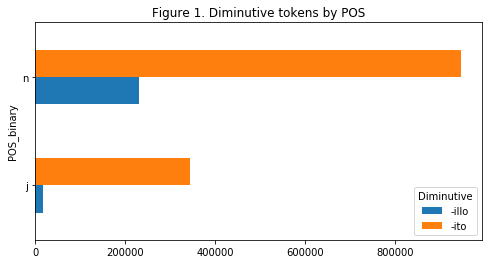

In [70]:
# Plot the Time Zone data as a bar-graph
DiminutivexPOS.unstack().plot.barh(rot=0, figsize=(8,4),title='Figure 1. Diminutive tokens by POS')

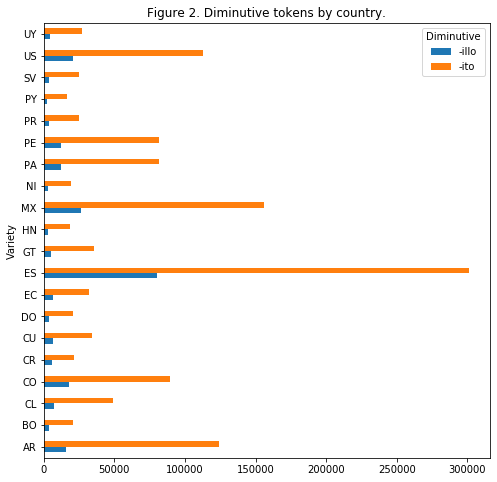

In [71]:
DiminutivexVariety.unstack().plot.barh(rot=0,figsize=(8,8),title ='Figure 2. Diminutive tokens by country.')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BDC205E48>,
      dtype=object)

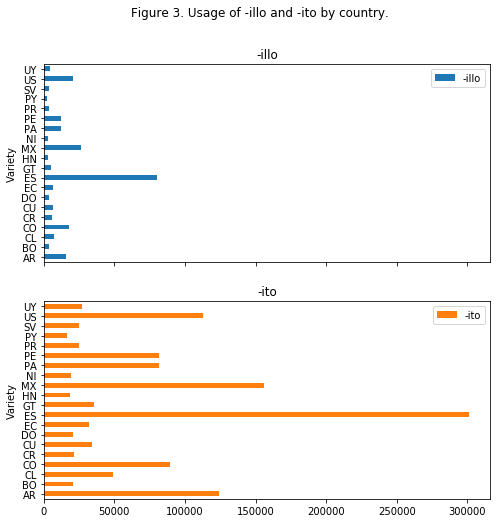

In [72]:
# Plot the Time Zone data as a bar-graph
DiminutivexVariety.unstack().plot.barh(rot=0, figsize=(8,8), 
                                       subplots=True, title ='Figure 3. Usage of -illo and -ito by country.')

### 4. Storing files

In [73]:
f = open ('master_DF.pkl', 'wb')
pickle.dump(master_DF, f, -1)
f.close()